In [1]:
import spotipy
import sys
import os
import webbrowser
import spotipy.util as util
from json.decoder import JSONDecodeError
import pandas as pd
import itertools
import json
# import s3fs
from datetime import datetime
# import boto3
from pandas.core.computation import scope
from spotipy import SpotifyOAuth

In [2]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [5]:
## for use with SpotifyClientCredentials
client_id = "ea47669c3d944a7f8ec4fc4232a4ac11"
client_secret = "b13f5d79c372416e9726d3246b93a8a1"

refresh_token = "AQBTALVFezh0s4DgKKUz3muo24eA4pSfgIhiUG0-r1KwL9MEs7U2_erb9RmuZcwxAjSnvc_JFdwuM1WvxBU6fzWefyhS9j7kTW8WQ1h64Nl6q_CRm8slyZNYUV29d4-gb18"                              

## for use with SpotifyClientCredentials & SpotifyOAuth
redirect_uri = "http://localhost:5000/redirect/"
scope = "user-library-modify"

In [6]:
# import requests

# # Replace 'your_client_id', 'your_client_secret', and 'your_refresh_token' with your actual Spotify Developer credentials and refresh token
# client_id = "ea47669c3d944a7f8ec4fc4232a4ac11"
# client_secret = "b13f5d79c372416e9726d3246b93a8a1"
# refresh_token = "AQBTALVFezh0s4DgKKUz3muo24eA4pSfgIhiUG0-r1KwL9MEs7U2_erb9RmuZcwxAjSnvc_JFdwuM1WvxBU6fzWefyhS9j7kTW8WQ1h64Nl6q_CRm8slyZNYUV29d4-gb18"                              

# # Spotify Accounts service endpoint
# token_url = "https://accounts.spotify.com/api/token"

# # Request body parameters
# data = {
#     'grant_type': 'refresh_token',
#     'refresh_token': refresh_token,
#     'client_id': client_id,
#     'client_secret': client_secret,
# }

# # Make the POST request to refresh the access token
# response = requests.post(token_url, data=data)

# # Parse the response JSON
# response_data = response.json()

# # Extract the new access token
# new_access_token = response_data.get('access_token')

# # Now you can use the new access token for Spotify API requests


In [7]:
# ## defining our working tracks & users

# track_uri = "spotify:track:443hE8XxCysK9EjHjsRO9x"                       # URI for Campfire
# artist_uri = "spotify:artist:7hMeb0h2KYV3AqAlNAApfM"                     # URI for Shobeatz
# user_uri = "spotify:user:313b4azrbbixbfns24wadcbxlhie"                   # URI for Shobhit Chauhan
# user_id = "313b4azrbbixbfns24wadcbxlhie"                                 # ID for Shobhit Chauhan

In [8]:
# # creating Spotify object via SpotifyClientCredentials

# spotipy_object = spotipy.Spotify(client_credentials_manager=spotipy.oauth2.SpotifyClientCredentials(
#                                  client_id, 
#                                  clien_secret))

In [9]:
## authorization via SpotifyOAuth; refreshing accesss token; creating spotipy_object

auth_manager=SpotifyOAuth(client_id, 
                          client_secret, 
                          redirect_uri, 
                          scope)
auth_manager.refresh_access_token(refresh_token)

spotipy_object = spotipy.Spotify(auth_manager=auth_manager)

In [10]:
# # track feature analysis using track_uri

# track_feat = spotipy_object.audio_features(track_uri)
# for items in track_feat:
#     print(items)
#     print(items.get('danceability'))                                   # loudness for Campfire

In [11]:
# for key, value in liked_anal.items():
#     print(key, value)

In [12]:
## api hit #1 for first batch of liked tracks

limit = 50
offset = 0

liked_anal = spotipy_object.current_user_saved_tracks(limit=limit, offset=offset)              # limit returns the number of 'items' (max 50)

## creating a seperate all liked track data (not necessary)
liked_anal_all = liked_anal.copy()

## will contain all info for all liked tracks
all_liked_tracks_all = []

for liked_track_name in liked_anal_all['items']:
    # liked_tracks_name = liked_track_name['track']
    all_liked_tracks_all.append(liked_track_name['track'])

In [13]:
## api hit #2 for all batches of liked tracks

## Checking if there are more tracks
while liked_anal_all['next']:
    offset += limit
    liked_anal_all = spotipy_object.current_user_saved_tracks(limit=limit, offset=offset)               
        
## adding the next set of results into all_tracks 
    for liked_track_name in liked_anal_all['items']:
        # liked_tracks_new = liked_track['track']
        all_liked_tracks_all.append(liked_track_name['track'])

all_liked_tracks_all

[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6dWcGqZzMm3mNuvc4yLVsj'},
     'href': 'https://api.spotify.com/v1/artists/6dWcGqZzMm3mNuvc4yLVsj',
     'id': '6dWcGqZzMm3mNuvc4yLVsj',
     'name': 'AJ Christou',
     'type': 'artist',
     'uri': 'spotify:artist:6dWcGqZzMm3mNuvc4yLVsj'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',
    'SE',
    'CH',
    'TW',
    'TR',
    'UY',
    'US',
    'GB',
    'AD',
    'LI',
    'MC',
    'ID',
    'JP',
    'TH',
    'VN',
  

In [14]:
## getting the liked track names & uris

name_uri_list = []

for all_liked_tracks in all_liked_tracks_all:
    # print(all_liked_tracks)

    ## getting value of name & uri keys
    trackname = all_liked_tracks.get('name')
    trackuri = all_liked_tracks.get('uri')

    ## below method also works to extract values of a key
    # trackname = all_liked_tracks['name']
    # trackuri = all_liked_tracks['uri']
        
    ## creating a dictionary; appending dictionary to name_uri_list
    name_uri_dict = {'name': trackname, 'uri': trackuri}
    name_uri_list.append(name_uri_dict)

track_name = pd.DataFrame(name_uri_list)
track_name

name                                   uri
0                           Club 702  spotify:track:20J21B8fwhU2ZJFsfysSlm
1    Last Night a D.J. Saved My Life  spotify:track:7pHswjfOmxFhnsq5XYrkTS
2              You Give Me Something  spotify:track:1x6jPyUfLuTNQ3o5zykG2x
3                          You and I  spotify:track:1uGFGhxJ9ISGcy7iDffP7V
4            Get Down Saturday Night  spotify:track:1MvIzSyxQjMIIBKrkGpN3K
..                               ...                                   ...
670      Witch Trials (Salem's Soul)  spotify:track:2EieddAdTtevi3njUqj5Ks
671     Heater - Tube & Berger Remix  spotify:track:62dWJq7A2vjDGGAKzW6tgZ
672    Give Her The D - Original Mix  spotify:track:6LvwaeP32kqzKhZ1gAJOvd
673                             Move  spotify:track:0Y1qSYzojWfuM0FBbnLQdz
674                        Childhood  spotify:track:5cqfH5bJTvycyBQqpshaev

[675 rows x 2 columns]

In [15]:
## creating a list of all liked track uris using track_name df

all_liked_tracks_uri = track_name.uri.to_list()
all_liked_tracks_uri

['spotify:track:20J21B8fwhU2ZJFsfysSlm',
 'spotify:track:7pHswjfOmxFhnsq5XYrkTS',
 'spotify:track:1x6jPyUfLuTNQ3o5zykG2x',
 'spotify:track:1uGFGhxJ9ISGcy7iDffP7V',
 'spotify:track:1MvIzSyxQjMIIBKrkGpN3K',
 'spotify:track:0QPIvb0xCx9iGZzcrp90DR',
 'spotify:track:3BLs15XUrOjXFnfymuenJU',
 'spotify:track:2ARwv32jHjD6DHTUhAr1LA',
 'spotify:track:67p2S2cCiLFrHkMhRffKvU',
 'spotify:track:0RQ0QSEuVZJkW4Sr48vW9p',
 'spotify:track:5CtpB1iKgSy6l4GTiZ1yxa',
 'spotify:track:6Z8R6UsFuGXGtiIxiD8ISb',
 'spotify:track:3OdyeX7u9sGpcrfXFkwWD1',
 'spotify:track:0bVaYn5YJ4tUF0Cm7rB2Rr',
 'spotify:track:5N5C69NmjT3RF0MLaW8kCM',
 'spotify:track:0Qn0i8df7Q76ej3RAXAtI2',
 'spotify:track:3cJh89D0za2SW705fNBo3b',
 'spotify:track:25F37dHEAbzandtlTRIcV2',
 'spotify:track:0DiWol3AO6WpXZgp0goxAV',
 'spotify:track:08fMRujpKhEDTanKN9l2ud',
 'spotify:track:32OlwWuMpZ6b0aN2RZOeMS',
 'spotify:track:1xNcBAoUw8Hz6LqK2jt4Ff',
 'spotify:track:19aRpHkbKkOta8Stb19ruz',
 'spotify:track:4JPQCXTf6FugwbQ1FXL7lP',
 'spotify:track:

In [16]:
# # creating a seperate uri specific liked track data 
# liked_anal_uri = liked_anal.copy()

# # creating seperate current_user_saved_tracks parameters for uri data
# limit1 = 50
# offset1 = 0

# # will contain uri for all liked tracks
# all_liked_tracks_uri = []

# for liked_track in liked_anal_uri['items']:
#     # liked_tracks = liked_track_uri['track']['uri']
#     all_liked_tracks_uri.append(liked_track['track']['uri'])

# # Checking if there are more tracks
# while liked_anal_uri['next']:
#     offset1 += limit1
#     liked_anal_uri = spotipy_object.current_user_saved_tracks(limit=limit1, offset=offset1)               
        
# # adding the next set of results into all_tracks 
#     for liked_track in liked_anal_uri['items']:
#         # liked_tracks_new = liked_track['track']['uri']
#         all_liked_tracks_uri.append(liked_track['track']['uri'])

# all_liked_tracks_uri

In [17]:
## to check error 429

track_anal = spotipy_object.audio_features('spotify:track:0QPIvb0xCx9iGZzcrp90DR')

In [18]:
## api hit 3 for all liked track features; creating track list using last created list & uri as iterable

all_track_anal = []

for track in all_liked_tracks_uri:
    track_anal = spotipy_object.audio_features(track)
    all_track_anal.append(track_anal)

print(len(all_track_anal))

675


In [19]:
## creating a df of all liked tracks

track_list = [] 

for track_features in all_track_anal:
    ## getting individual lists of track dictionaries
    # print(track_features)

    for features in track_features:
        ## getting the actual track dictionaries from the individual lists
        # print(features)

        ## appending the track dictionaries into a single list & creating a df
        track_list.append(features)
        # print(track_list)
        track_df = pd.DataFrame(track_list)

track_df


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.802   0.847    2    -8.969     1       0.0546      0.003470   
1           0.914   0.476   11    -7.538     1       0.1620      0.111000   
2           0.639   0.690    7   -10.047     1       0.2640      0.026500   
3           0.718   0.676   11   -11.633     0       0.0318      0.153000   
4           0.865   0.611   11   -11.571     0       0.0573      0.226000   
..            ...     ...  ...       ...   ...          ...           ...   
670         0.635   0.928    1    -9.308     1       0.0392      0.010700   
671         0.780   0.868    6    -5.864     0       0.0589      0.000199   
672         0.875   0.821   11    -7.408     0       0.1020      0.000624   
673         0.731   0.960    1    -5.426     1       0.0634      0.000680   
674         0.705   0.567    9   -11.188     0       0.0434      0.004340   

     instrumentalness  liveness  valence    tempo            type  \
0            0.928000    0.0656    0.779  131.999  audio_features   
1            0.002480    0.0669    0.657  109.562  audio_features   
2            0.000551    0.1460    0.579  119.630  audio_features   
3            0.030600    0.0706    0.944  112.711  audio_features   
4            0.082000    0.0572    0.963  116.545  audio_features   
..                ...       ...      ...      ...             ...   
670          0.784000    0.0965    0.454  128.007  audio_features   
671          0.907000    0.2260    0.115  125.007  audio_features   
672          0.871000    0.1900    0.582  123.995  audio_features   
673          0.203000    0.1030    0.266  121.009  audio_features   
674          0.876000    0.0779    0.513  123.006  audio_features   

                         id                                   uri  \
0    20J21B8fwhU2ZJFsfysSlm  spotify:track:20J21B8fwhU2ZJFsfysSlm   
1    7pHswjfOmxFhnsq5XYrkTS  spotify:track:7pHswjfOmxFhnsq5XYrkTS   
2    1x6jPyUfLuTNQ3o5zykG2x  spotify:track:1x6jPyUfLuTNQ3o5zykG2x   
3    1uGFGhxJ9ISGcy7iDffP7V  spotify:track:1uGFGhxJ9ISGcy7iDffP7V   
4    1MvIzSyxQjMIIBKrkGpN3K  spotify:track:1MvIzSyxQjMIIBKrkGpN3K   
..                      ...                                   ...   
670  2EieddAdTtevi3njUqj5Ks  spotify:track:2EieddAdTtevi3njUqj5Ks   
671  62dWJq7A2vjDGGAKzW6tgZ  spotify:track:62dWJq7A2vjDGGAKzW6tgZ   
672  6LvwaeP32kqzKhZ1gAJOvd  spotify:track:6LvwaeP32kqzKhZ1gAJOvd   
673  0Y1qSYzojWfuM0FBbnLQdz  spotify:track:0Y1qSYzojWfuM0FBbnLQdz   
674  5cqfH5bJTvycyBQqpshaev  spotify:track:5cqfH5bJTvycyBQqpshaev   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/20J21B8fwhU2...   
1    https://api.spotify.com/v1/tracks/7pHswjfOmxFh...   
2    https://api.spotify.com/v1/tracks/1x6jPyUfLuTN...   
3    https://api.spotify.com/v1/tracks/1uGFGhxJ9ISG...   
4    https://api.spotify.com/v1/tracks/1MvIzSyxQjMI...   
..                                                 ...   
670  https://api.spotify.com/v1/tracks/2EieddAdTtev...   
671  https://api.spotify.com/v1/tracks/62dWJq7A2vjD...   
672  https://api.spotify.com/v1/tracks/6LvwaeP32kqz...   
673  https://api.spotify.com/v1/tracks/0Y1qSYzojWfu...   
674  https://api.spotify.com/v1/tracks/5cqfH5bJTvyc...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/20J2...       363636   
1    https://api.spotify.com/v1/audio-analysis/7pHs...       340136   
2    https://api.spotify.com/v1/audio-analysis/1x6j...       199600   
3    https://api.spotify.com/v1/audio-analysis/1uGF...       316267   
4    https://api.spotify.com/v1/audio-analysis/1MvI...       241907   
..                                                 ...          ...   
670  https://api.spotify.com/v1/audio-analysis/2Eie...       360000   
671  https://api.spotify.com/v1/audio-analysis/62dW...       415125   
672  https://api.spotify.com/v1/audio-analysis/6Lvw...       394350   
673  https://ap

In [20]:
# # Another way to do the above step using list comprehension

# track_list = [features for track_features in all_track_anal for features in track_features]
# df = pd.DataFrame(track_list)

In [21]:
## merging track_name into track_list df to create main_df

main_df = track_df.merge(track_name, on = 'uri')
main_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.802   0.847    2    -8.969     1       0.0546      0.003470   
1           0.914   0.476   11    -7.538     1       0.1620      0.111000   
2           0.639   0.690    7   -10.047     1       0.2640      0.026500   
3           0.718   0.676   11   -11.633     0       0.0318      0.153000   
4           0.865   0.611   11   -11.571     0       0.0573      0.226000   
..            ...     ...  ...       ...   ...          ...           ...   
670         0.635   0.928    1    -9.308     1       0.0392      0.010700   
671         0.780   0.868    6    -5.864     0       0.0589      0.000199   
672         0.875   0.821   11    -7.408     0       0.1020      0.000624   
673         0.731   0.960    1    -5.426     1       0.0634      0.000680   
674         0.705   0.567    9   -11.188     0       0.0434      0.004340   

     instrumentalness  liveness  valence    tempo            type  \
0            0.928000    0.0656    0.779  131.999  audio_features   
1            0.002480    0.0669    0.657  109.562  audio_features   
2            0.000551    0.1460    0.579  119.630  audio_features   
3            0.030600    0.0706    0.944  112.711  audio_features   
4            0.082000    0.0572    0.963  116.545  audio_features   
..                ...       ...      ...      ...             ...   
670          0.784000    0.0965    0.454  128.007  audio_features   
671          0.907000    0.2260    0.115  125.007  audio_features   
672          0.871000    0.1900    0.582  123.995  audio_features   
673          0.203000    0.1030    0.266  121.009  audio_features   
674          0.876000    0.0779    0.513  123.006  audio_features   

                         id                                   uri  \
0    20J21B8fwhU2ZJFsfysSlm  spotify:track:20J21B8fwhU2ZJFsfysSlm   
1    7pHswjfOmxFhnsq5XYrkTS  spotify:track:7pHswjfOmxFhnsq5XYrkTS   
2    1x6jPyUfLuTNQ3o5zykG2x  spotify:track:1x6jPyUfLuTNQ3o5zykG2x   
3    1uGFGhxJ9ISGcy7iDffP7V  spotify:track:1uGFGhxJ9ISGcy7iDffP7V   
4    1MvIzSyxQjMIIBKrkGpN3K  spotify:track:1MvIzSyxQjMIIBKrkGpN3K   
..                      ...                                   ...   
670  2EieddAdTtevi3njUqj5Ks  spotify:track:2EieddAdTtevi3njUqj5Ks   
671  62dWJq7A2vjDGGAKzW6tgZ  spotify:track:62dWJq7A2vjDGGAKzW6tgZ   
672  6LvwaeP32kqzKhZ1gAJOvd  spotify:track:6LvwaeP32kqzKhZ1gAJOvd   
673  0Y1qSYzojWfuM0FBbnLQdz  spotify:track:0Y1qSYzojWfuM0FBbnLQdz   
674  5cqfH5bJTvycyBQqpshaev  spotify:track:5cqfH5bJTvycyBQqpshaev   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/20J21B8fwhU2...   
1    https://api.spotify.com/v1/tracks/7pHswjfOmxFh...   
2    https://api.spotify.com/v1/tracks/1x6jPyUfLuTN...   
3    https://api.spotify.com/v1/tracks/1uGFGhxJ9ISG...   
4    https://api.spotify.com/v1/tracks/1MvIzSyxQjMI...   
..                                                 ...   
670  https://api.spotify.com/v1/tracks/2EieddAdTtev...   
671  https://api.spotify.com/v1/tracks/62dWJq7A2vjD...   
672  https://api.spotify.com/v1/tracks/6LvwaeP32kqz...   
673  https://api.spotify.com/v1/tracks/0Y1qSYzojWfu...   
674  https://api.spotify.com/v1/tracks/5cqfH5bJTvyc...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/20J2...       363636   
1    https://api.spotify.com/v1/audio-analysis/7pHs...       340136   
2    https://api.spotify.com/v1/audio-analysis/1x6j...       199600   
3    https://api.spotify.com/v1/audio-analysis/1uGF...       316267   
4    https://api.spotify.com/v1/audio-analysis/1MvI...       241907   
..                                                 ...          ...   
670  https://api.spotify.com/v1/audio-analysis/2Eie...       360000   
671  https://api.spotify.com/v1/audio-analysis/62dW...       415125   
672  https://api.spotify.com/v1/audio-analysis/6Lvw...       394350   
673  https://ap

In [22]:
main_df = main_df.sort_values(by='tempo',ascending=False).reset_index(drop=True)
main_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.641   0.968    2    -9.777     1       0.1810      0.000484   
1           0.684   0.687    2    -4.673     1       0.2000      0.016400   
2           0.501   0.963    7    -5.459     1       0.0973      0.000648   
3           0.715   0.676    6   -11.895     1       0.2160      0.483000   
4           0.599   0.920    2    -2.843     1       0.1300      0.001190   
..            ...     ...  ...       ...   ...          ...           ...   
670         0.803   0.737   11    -7.469     1       0.2580      0.323000   
671         0.684   0.933   11    -1.730     0       0.2550      0.209000   
672         0.671   0.737    0    -5.131     1       0.1080      0.033800   
673         0.404   0.937    8    -3.440     1       0.0487      0.000037   
674         0.107   0.168    4   -16.070     1       0.0490      0.305000   

     instrumentalness  liveness  valence    tempo            type  \
0             0.86300    0.5880   0.7410  247.995  audio_features   
1             0.00000    0.2530   0.2650  184.026  audio_features   
2             0.28400    0.0993   0.0751  181.955  audio_features   
3             0.00185    0.1020   0.4680  181.859  audio_features   
4             0.40300    0.2090   0.2850  179.986  audio_features   
..                ...       ...      ...      ...             ...   
670           0.00000    0.8880   0.4840   92.941  audio_features   
671           0.00000    0.6890   0.7890   92.161  audio_features   
672           0.00344    0.0596   0.1970   90.519  audio_features   
673           0.00254    0.2710   0.7760   89.858  audio_features   
674           0.77400    0.1020   0.0393   88.628  audio_features   

                         id                                   uri  \
0    521Xx4H6DOnJdm0qLPGAcN  spotify:track:521Xx4H6DOnJdm0qLPGAcN   
1    2B9wgj9XzbJZLty03PRbVo  spotify:track:2B9wgj9XzbJZLty03PRbVo   
2    13AsTzqHpaD6qleOQ7ypPM  spotify:track:13AsTzqHpaD6qleOQ7ypPM   
3    0bO9mhJpH5R5ixn9Gv8F6O  spotify:track:0bO9mhJpH5R5ixn9Gv8F6O   
4    0LF3laZt24GkVkd6ZyJlw8  spotify:track:0LF3laZt24GkVkd6ZyJlw8   
..                      ...                                   ...   
670  6iGSLWmAj6E4GGnSzLxBJf  spotify:track:6iGSLWmAj6E4GGnSzLxBJf   
671  480GXuZbzx6zJBvKo8jUti  spotify:track:480GXuZbzx6zJBvKo8jUti   
672  1rylJ0VXvhOzLGNm401iaI  spotify:track:1rylJ0VXvhOzLGNm401iaI   
673  0TB7xPRIQ6sZqH8q50maWh  spotify:track:0TB7xPRIQ6sZqH8q50maWh   
674  1Gzj6tmQ02vTMFHbPVW2ue  spotify:track:1Gzj6tmQ02vTMFHbPVW2ue   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/521Xx4H6DOnJ...   
1    https://api.spotify.com/v1/tracks/2B9wgj9XzbJZ...   
2    https://api.spotify.com/v1/tracks/13AsTzqHpaD6...   
3    https://api.spotify.com/v1/tracks/0bO9mhJpH5R5...   
4    https://api.spotify.com/v1/tracks/0LF3laZt24Gk...   
..                                                 ...   
670  https://api.spotify.com/v1/tracks/6iGSLWmAj6E4...   
671  https://api.spotify.com/v1/tracks/480GXuZbzx6z...   
672  https://api.spotify.com/v1/tracks/1rylJ0VXvhOz...   
673  https://api.spotify.com/v1/tracks/0TB7xPRIQ6sZ...   
674  https://api.spotify.com/v1/tracks/1Gzj6tmQ02vT...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/521X...       483934   
1    https://api.spotify.com/v1/audio-analysis/2B9w...       151067   
2    https://api.spotify.com/v1/audio-analysis/13As...       188413   
3    https://api.spotify.com/v1/audio-analysis/0bO9...       211788   
4    https://api.spotify.com/v1/audio-analysis/0LF3...       185333   
..                                                 ...          ...   
670  https://api.spotify.com/v1/audio-analysis/6iGS...       251133   
671  https://api.spotify.com/v1/audio-analysis/480G...       213420   
672  https://api.spotify.com/v1/audio-analysis/1ryl...       310227   
673  https://ap

In [23]:
# columns to perform modelling over
cols_of_interest = ['danceability', 'energy','loudness','acousticness','instrumentalness','valence','tempo','duration_ms','liveness','mode']

# Separating the columns we want to scale differently
low_significant = ['acousticness','liveness'] 
med_significant = ['duration_ms','mode','danceability','instrumentalness']
high_significant = ['energy','loudness']
most_significant = ['valence','tempo']

In [24]:
X = main_df[cols_of_interest]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      675 non-null    float64
 1   energy            675 non-null    float64
 2   loudness          675 non-null    float64
 3   acousticness      675 non-null    float64
 4   instrumentalness  675 non-null    float64
 5   valence           675 non-null    float64
 6   tempo             675 non-null    float64
 7   duration_ms       675 non-null    int64  
 8   liveness          675 non-null    float64
 9   mode              675 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 52.9 KB


In [25]:
# Scale the columns using StandardScaler, giving more weight to the significant column
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[low_significant] = scaler.fit_transform(X_scaled[low_significant]) * 0.2  # Scaling to give less significance
X_scaled[med_significant] = scaler.fit_transform(X_scaled[med_significant]) * 0.4
X_scaled[high_significant] = scaler.fit_transform(X_scaled[high_significant]) * 0.8
X_scaled[most_significant] = scaler.fit_transform(X_scaled[most_significant])

In [26]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X_scaled)
    sum_of_squared_distances.append(k_means.inertia_)

/Users/Shobeatz/Documents/VS_Code/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Shobeatz/Documents/VS_Code/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Shobeatz/Documents/VS_Code/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Shobeatz/Documents/VS_Code/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416:

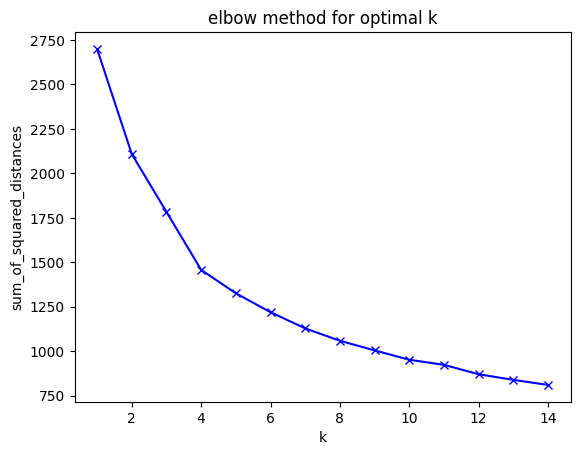

In [27]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [28]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=6)

#Run the clustering algorithm
model = k_means.fit(X_scaled)
model

#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X_scaled)

/Users/Shobeatz/Documents/VS_Code/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
labels = k_means.labels_
metrics.silhouette_score(X_scaled, labels, metric = 'euclidean')

0.20843662385496062

In [30]:
metrics.calinski_harabasz_score(X_scaled, labels)

162.50669745022662

In [31]:
# Add the cluster labels to the dataframe
main_df['Cluster'] = labels

In [32]:
main_df[main_df.Cluster == 0]

danceability  energy  key  loudness  mode  speechiness  acousticness  \
26          0.650   0.718    1   -13.777     1       0.0518      0.619000   
41          0.685   0.584    5   -10.616     0       0.0276      0.288000   
56          0.600   0.668    6    -8.636     0       0.1120      0.000112   
62          0.727   0.723    1   -12.212     1       0.0656      0.000869   
71          0.770   0.660    3   -10.275     0       0.0355      0.032600   
77          0.802   0.652   10    -9.722     0       0.0766      0.007670   
80          0.764   0.660    7   -11.132     0       0.0376      0.283000   
105         0.803   0.630    4   -10.500     1       0.0966      0.021100   
107         0.798   0.572    6   -12.915     0       0.0543      0.090000   
118         0.802   0.698    2   -10.735     1       0.1440      0.007060   
130         0.754   0.576    0    -9.698     1       0.0598      0.023900   
142         0.644   0.857    0   -13.060     0       0.0429      0.009900   
147         0.653   0.549    5    -9.454     0       0.0547      0.000017   
158         0.805   0.686    9    -9.871     1       0.0451      0.026100   
163         0.836   0.532    7    -9.552     0       0.0488      0.000548   
178         0.807   0.453    1   -14.517     1       0.0575      0.000177   
189         0.810   0.590    7   -12.908     1       0.0622      0.000213   
204         0.790   0.711    2    -9.212     1       0.0546      0.000903   
209         0.706   0.672   11   -12.942     0       0.0376      0.532000   
214         0.964   0.644    4    -9.498     0       0.3270      0.023200   
215         0.799   0.711    1    -9.617     0       0.0787      0.008840   
221         0.800   0.512   10   -10.177     0       0.0838      0.001230   
226         0.795   0.627   10   -14.155     0       0.0605      0.066800   
239         0.804   0.624   11   -10.588     0       0.0489      0.021200   
241         0.809   0.757   10    -9.950     0       0.0635      0.016400   
244         0.807   0.711   10   -10.227     0       0.0544      0.001010   
246         0.778   0.764    6   -11.928     1       0.0616      0.048100   
249         0.838   0.362    7   -11.019     1       0.1000      0.000516   
250         0.795   0.626    0   -11.830     1       0.0607      0.008180   
254         0.808   0.705   10   -11.838     0       0.0468      0.000071   
258         0.805   0.487   10   -13.303     0       0.0517      0.010500   
260         0.807   0.558    1   -11.380     0       0.0564      0.003970   
289         0.811   0.657    1   -12.411     0       0.0736      0.292000   
290         0.809   0.753   10   -13.765     0       0.0667      0.000698   
291         0.840   0.472    8   -10.394     0       0.1250      0.007040   
301         0.921   0.577    6    -8.512     1       0.0388      0.000864   
310         0.807   0.634    1    -8.900     1       0.0983      0.000048   
315         0.765   0.657    5    -8.243     0       0.0322      0.001280   
320         0.825   0.750    1    -9.713     1       0.1490      0.001540   
326         0.813   0.570    7   -12.253     1       0.0467      0.000343   
327         0.812   0.625   11   -10.252     1       0.0573      0.004900   
337         0.790   0.425    2   -13.430     0       0.0691      0.265000   
343         0.810   0.556    8   -11.584     1       0.0448      0.001640   
346         0.764   0.512    7   -11.808     1       0.0695      0.010400   
352         0.803   0.789    2   -10.635     1       0.0468      0.009910   
355         0.793   0.588    6   -10.179     1       0.0779      0.000287   
378         0.809   0.498   11   -14.583     1       0.0605      0.003610   
383         0.805   0.662    1    -8.734     1       0.0764      0.006050   
390         0.813   0.667    8   -10.773     1       0.0670      0.000083   
393         0.763   0.608    4   -12.722     0       0.0426      0.529000   
407         0.804   0.455    2    -9.435     1       0.0372      0.019500   
4

In [33]:
main_df[main_df.Cluster == 1]

danceability  energy  key  loudness  mode  speechiness  acousticness  \
12          0.772   0.993    7    -8.575     1       0.1590      0.091700   
14          0.600   0.944    4    -6.003     0       0.0420      0.003220   
16          0.592   0.869    2    -9.716     1       0.0595      0.075900   
17          0.644   0.962    1    -8.465     1       0.0626      0.009490   
18          0.626   0.962    6    -8.428     1       0.0474      0.007090   
19          0.780   0.838    0    -8.589     1       0.0687      0.026700   
22          0.605   0.915   11    -8.950     0       0.0422      0.001040   
23          0.733   0.855   11   -11.486     0       0.1870      0.159000   
24          0.535   0.997    8    -7.565     1       0.0516      0.000875   
25          0.669   0.974    7    -7.137     1       0.0717      0.000708   
27          0.724   0.761    7   -12.673     1       0.0469      0.290000   
28          0.777   0.815    9   -11.540     1       0.0486      0.001270   
29          0.638   0.914    7    -7.374     1       0.0599      0.004410   
30          0.752   0.913    5   -11.714     1       0.0573      0.654000   
31          0.559   0.933    1    -8.657     1       0.0629      0.000033   
32          0.588   0.783   11    -9.596     0       0.0532      0.000079   
33          0.758   0.751    6    -8.402     1       0.0555      0.012400   
35          0.731   0.973    7   -11.269     1       0.0550      0.000067   
37          0.620   0.923    9    -8.542     0       0.1450      0.008540   
38          0.737   0.973   11    -7.599     0       0.0415      0.001110   
39          0.609   0.690    4   -11.221     0       0.0375      0.001120   
40          0.566   0.764    7   -12.280     1       0.0457      0.284000   
42          0.703   0.963    0    -9.152     1       0.1900      0.002060   
43          0.791   0.880    7    -7.882     1       0.0611      0.006840   
44          0.619   0.800    0    -9.385     1       0.0338      0.001250   
46          0.587   0.698    1    -8.948     1       0.0943      0.015200   
47          0.404   0.976   10   -11.209     0       0.0615      0.048900   
48          0.767   0.905   10   -11.374     0       0.1070      0.043200   
50          0.657   0.938    7    -9.350     1       0.0445      0.017500   
51          0.499   0.976    2    -6.584     1       0.0378      0.004320   
52          0.503   0.942    6    -8.591     0       0.2290      0.005260   
53          0.721   0.854    8    -9.786     1       0.0491      0.003060   
67          0.734   0.891    6    -7.938     0       0.0626      0.007870   
68          0.606   0.795    8   -10.399     0       0.0426      0.199000   
69          0.660   0.931    7   -10.398     1       0.0795      0.179000   
75          0.561   0.854    0    -9.531     1       0.0582      0.000146   
85          0.732   0.625    0    -9.240     0       0.1240      0.000013   
86          0.542   0.901    5    -8.571     1       0.0328      0.000011   
87          0.751   0.765   11    -7.345     0       0.0553      0.000740   
88          0.745   0.722    7   -10.723     1       0.0627      0.015800   
89          0.680   0.992   11    -6.682     1       0.0531      0.004660   
91          0.674   0.955    1    -5.538     1       0.0504      0.001650   
93          0.565   0.840    4   -10.347     0       0.0655      0.002990   
95          0.624   0.828    1    -9.808     1       0.0485      0.215000   
103         0.809   0.846    6   -12.241     0       0.0510      0.001020   
104         0.672   0.818    1   -10.206     0       0.0423      0.000645   
109         0.798   0.903    0   -11.115     1       0.0428      0.000019   
113         0.804   0.848    1    -8.552     1       0.1160      0.000097   
114         0.799   0.789    0    -8.386     1       0.1030      0.004880   
116         0.795   0.874    1   -10.344     1       0.0673      0.012300   
120         0.677   0.801    7    -6.867     1       0.0512      0.003130   
1

In [34]:
main_df[main_df.Cluster == 2]

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.641   0.968    2    -9.777     1       0.1810      0.000484   
1         0.684   0.687    2    -4.673     1       0.2000      0.016400   
2         0.501   0.963    7    -5.459     1       0.0973      0.000648   
3         0.715   0.676    6   -11.895     1       0.2160      0.483000   
4         0.599   0.920    2    -2.843     1       0.1300      0.001190   
5         0.443   0.706    4    -6.900     0       0.3880      0.112000   
6         0.553   0.852   10    -4.080     0       0.3050      0.007130   
7         0.576   0.769   10    -5.369     0       0.3210      0.036300   
8         0.525   0.881    4    -5.943     0       0.0330      0.001550   
9         0.470   0.834    0    -9.156     0       0.0368      0.000065   

   instrumentalness  liveness  valence    tempo            type  \
0          0.863000    0.5880   0.7410  247.995  audio_features   
1          0.000000    0.2530   0.2650  184.026  audio_features   
2          0.284000    0.0993   0.0751  181.955  audio_features   
3          0.001850    0.1020   0.4680  181.859  audio_features   
4          0.403000    0.2090   0.2850  179.986  audio_features   
5          0.000770    0.3240   0.2580  179.291  audio_features   
6          0.000000    0.4630   0.2700  176.058  audio_features   
7          0.000173    0.1160   0.8200  174.418  audio_features   
8          0.284000    0.1500   0.6770  163.010  audio_features   
9          0.000950    0.3720   0.1840  162.910  audio_features   

                       id                                   uri  \
0  521Xx4H6DOnJdm0qLPGAcN  spotify:track:521Xx4H6DOnJdm0qLPGAcN   
1  2B9wgj9XzbJZLty03PRbVo  spotify:track:2B9wgj9XzbJZLty03PRbVo   
2  13AsTzqHpaD6qleOQ7ypPM  spotify:track:13AsTzqHpaD6qleOQ7ypPM   
3  0bO9mhJpH5R5ixn9Gv8F6O  spotify:track:0bO9mhJpH5R5ixn9Gv8F6O   
4  0LF3laZt24GkVkd6ZyJlw8  spotify:track:0LF3laZt24GkVkd6ZyJlw8   
5  2L5R5nruXzIwXJhoF8zSt8  spotify:track:2L5R5nruXzIwXJhoF8zSt8   
6  5Mtt6tZSZA9cXTHGSGpyh0  spotify:track:5Mtt6tZSZA9cXTHGSGpyh0   
7  2tb0vFdfgB05CM0LWp3yOt  spotify:track:2tb0vFdfgB05CM0LWp3yOt   
8  4Lgo0e03woV055yCKSMFuG  spotify:track:4Lgo0e03woV055yCKSMFuG   
9  4E0SwMbCpOG8KvPQzsw1o8  spotify:track:4E0SwMbCpOG8KvPQzsw1o8   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/521Xx4H6DOnJ...   
1  https://api.spotify.com/v1/tracks/2B9wgj9XzbJZ...   
2  https://api.spotify.com/v1/tracks/13AsTzqHpaD6...   
3  https://api.spotify.com/v1/tracks/0bO9mhJpH5R5...   
4  https://api.spotify.com/v1/tracks/0LF3laZt24Gk...   
5  https://api.spotify.com/v1/tracks/2L5R5nruXzIw...   
6  https://api.spotify.com/v1/tracks/5Mtt6tZSZA9c...   
7  https://api.spotify.com/v1/tracks/2tb0vFdfgB05...   
8  https://api.spotify.com/v1/tracks/4Lgo0e03woV0...   
9  https://api.spotify.com/v1/tracks/4E0SwMbCpOG8...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/521X...       483934   
1  https://api.spotify.com/v1/audio-analysis/2B9w...       151067   
2  https://api.spotify.com/v1/audio-analysis/13As...       188413   
3  https://api.spotify.com/v1/audio-analysis/0bO9...       211788   
4  https://api.spotify.com/v1/audio-analysis/0LF3...       185333   
5  https://api.spotify.com/v1/audio-analysis/2L5R...       178667   
6  https://api.spotify.com/v1/audio-analysis/5Mtt...       328827   
7  https://api.spotify.com/v1/audio-analysis/2tb0...       173793   
8  https://api.spotify.com/v1/audio-analysis/4Lgo...       254588   
9  https://api.spotify.com/v1/audio-analysis/4E0S...       324018   

   time_signature                                            name  Cluster  
0               4  Creatures of the Night - Viviano's Terrace Mix        2  
1               4                        Bezerk (feat. A$AP Ferg)        2  
2               3                                            Orck        2  
3               

In [35]:
main_df[main_df.Cluster == 3]

danceability  energy  key  loudness  mode  speechiness  acousticness  \
13          0.741   0.873    1   -13.013     0       0.0756      0.287000   
15          0.623   0.996    1    -5.615     1       0.0660      0.004420   
20          0.667   0.873    4   -11.978     0       0.0654      0.104000   
21          0.629   0.980    7    -7.291     1       0.0486      0.013300   
36          0.593   0.846   10   -10.126     0       0.0492      0.000084   
45          0.794   0.918    7    -8.270     1       0.0522      0.063100   
49          0.763   0.908    7    -9.399     1       0.0508      0.147000   
54          0.797   0.878    6   -12.278     0       0.0874      0.025500   
55          0.792   0.839    0    -7.571     1       0.0482      0.001140   
57          0.792   0.945    9    -9.465     1       0.0683      0.000027   
58          0.802   0.847    2    -8.969     1       0.0546      0.003470   
59          0.775   0.908   10    -8.731     0       0.0578      0.005780   
60          0.791   0.967   11    -6.097     0       0.0433      0.000059   
61          0.795   0.955    8    -7.337     1       0.0511      0.000236   
63          0.791   0.978    1    -7.839     1       0.0595      0.000027   
72          0.590   0.645    1    -8.101     0       0.0335      0.000023   
74          0.761   0.979    2    -5.642     1       0.0509      0.008660   
76          0.796   0.993   11    -6.603     1       0.0619      0.000192   
79          0.794   0.960    5    -7.763     0       0.0632      0.016200   
81          0.709   0.843   11    -8.381     0       0.0375      0.001990   
82          0.799   0.978   10    -8.234     0       0.0613      0.000235   
83          0.802   0.934    5    -7.430     0       0.0570      0.119000   
84          0.797   0.918    5    -8.404     0       0.0456      0.103000   
94          0.766   0.783   11    -8.562     1       0.0538      0.001360   
97          0.856   0.869    7    -9.082     1       0.1710      0.131000   
98          0.787   0.983   11    -9.384     0       0.1680      0.000774   
99          0.805   0.877    6    -8.440     0       0.0851      0.004490   
100         0.802   0.908    1   -10.129     0       0.0850      0.001480   
101         0.784   0.971   11    -7.702     0       0.0599      0.001330   
102         0.750   0.979    5    -7.170     1       0.0527      0.010100   
106         0.801   0.962    1    -4.864     1       0.0551      0.000712   
110         0.802   0.926    2    -9.618     1       0.0611      0.008970   
111         0.796   0.838    8   -10.426     0       0.0408      0.000044   
112         0.804   0.828    0   -10.132     1       0.0554      0.006930   
115         0.798   0.943    0    -8.401     1       0.0617      0.013500   
117         0.735   0.819    1    -7.172     1       0.0700      0.002910   
119         0.807   0.861    1   -11.620     1       0.0784      0.000452   
121         0.690   0.976    3    -4.440     0       0.0558      0.000897   
122         0.806   0.769    5    -8.430     0       0.0426      0.001920   
124         0.592   0.948    7    -6.071     0       0.0467      0.034100   
127         0.798   0.856    6   -10.157     1       0.0624      0.258000   
131         0.804   0.839    7   -11.305     1       0.0638      0.001230   
134         0.808   0.782   10    -9.241     1       0.0692      0.001740   
136         0.796   0.968    0    -7.457     1       0.0474      0.000143   
137         0.893   0.823    5    -3.708     0       0.1220      0.071400   
138         0.808   0.951   10   -11.911     0       0.0807      0.153000   
140         0.788   0.761    9   -10.249     0       0.0437      0.008580   
144         0.803   0.988    5    -7.509     0       0.0477      0.000046   
145         0.805   0.884    7    -9.795     1       0.0711      0.000040   
148         0.805   0.865   10    -9.014     0       0.0589      0.000696   
150         0.713   0.674   10    -7.434     0       0.0729      0.004020   
1

In [36]:
main_df[main_df.Cluster == 4]

danceability  energy  key  loudness  mode  speechiness  acousticness  \
10          0.187   0.634    1   -13.563     1       0.0362      0.881000   
34          0.829   0.468    0   -10.808     1       0.2100      0.019800   
64          0.617   0.471    9   -16.591     0       0.0378      0.713000   
65          0.736   0.657    6   -15.679     1       0.0541      0.060200   
66          0.666   0.578    7   -13.917     1       0.0371      0.014900   
70          0.452   0.112    9   -19.168     0       0.0363      0.939000   
78          0.770   0.467    4   -15.329     0       0.1280      0.059000   
92          0.736   0.626    4   -11.972     0       0.1660      0.055600   
108         0.647   0.562    7   -14.790     1       0.0366      0.209000   
123         0.646   0.490    1   -17.497     1       0.0397      0.322000   
128         0.800   0.487   11   -12.740     0       0.1670      0.000304   
141         0.640   0.644    4   -21.381     0       0.1050      0.393000   
154         0.661   0.735    7   -14.349     1       0.0442      0.021700   
157         0.799   0.538   10   -14.525     0       0.0912      0.070000   
164         0.799   0.529    1   -10.129     1       0.0472      0.086200   
166         0.778   0.754   11   -14.373     0       0.0419      0.002970   
173         0.792   0.576    0    -9.947     1       0.2480      0.487000   
187         0.798   0.551    7   -12.004     1       0.0623      0.038500   
190         0.806   0.368    9   -15.171     0       0.0664      0.728000   
210         0.574   0.641   11   -13.380     0       0.0387      0.002000   
213         0.761   0.473    4   -13.623     0       0.0559      0.183000   
222         0.630   0.460    1   -18.365     1       0.0438      0.765000   
231         0.679   0.568    7   -13.745     1       0.0529      0.265000   
234         0.627   0.557    2   -15.668     1       0.0457      0.125000   
236         0.616   0.276    8   -17.269     1       0.0507      0.009410   
253         0.809   0.595    1   -11.421     0       0.0515      0.004600   
271         0.808   0.412   10   -15.568     0       0.0606      0.000060   
275         0.793   0.634    0   -13.730     1       0.0525      0.006730   
278         0.512   0.620    4   -14.506     0       0.0917      0.020900   
298         0.786   0.389    1   -10.466     1       0.3370      0.571000   
303         0.810   0.627    1   -14.343     0       0.1740      0.081700   
304         0.805   0.590    1   -16.452     1       0.0527      0.035400   
312         0.810   0.527    1   -13.212     0       0.0714      0.009240   
314         0.872   0.455    2   -10.450     1       0.0501      0.022600   
316         0.801   0.562    1   -17.259     0       0.0505      0.073200   
319         0.718   0.511    7   -15.759     1       0.0554      0.008430   
321         0.805   0.525    6   -15.231     1       0.0848      0.415000   
322         0.887   0.468   10    -9.881     0       0.0919      0.000071   
330         0.690   0.644    8   -13.054     1       0.0528      0.004260   
332         0.811   0.375   11   -12.725     1       0.0623      0.004320   
362         0.841   0.483    8   -10.873     1       0.0994      0.000840   
368         0.573   0.247    7   -21.527     1       0.0360      0.555000   
374         0.741   0.421    2   -12.463     0       0.0763      0.518000   
388         0.808   0.419   11   -14.361     0       0.1300      0.014600   
389         0.917   0.472   11   -10.165     0       0.1300      0.002620   
391         0.679   0.633    8   -11.514     1       0.0521      0.013200   
403         0.778   0.642    7   -12.971     1       0.0400      0.026700   
415         0.627   0.508    8   -11.536     1       0.0337      0.001430   
416         0.747   0.614    7   -12.022     1       0.0597      0.037400   
430         0.570   0.361    4   -18.405     0       0.0413      0.335000   
451         0.810   0.535    1   -11.808     1       0.0779      0.045300   
4

In [37]:
main_df[main_df.Cluster == 5]

danceability  energy  key  loudness  mode  speechiness  acousticness  \
11          0.472   0.923   11    -4.784     0       0.0785      0.001990   
73          0.475   0.925    1    -3.942     0       0.0473      0.030200   
90          0.679   0.873    4    -4.386     0       0.0277      0.000700   
96          0.619   0.880    1    -4.549     0       0.0535      0.017300   
126         0.567   0.959    8    -2.891     1       0.0395      0.000309   
133         0.668   0.965    7    -2.293     1       0.0910      0.057900   
160         0.853   0.948   11    -5.671     0       0.1000      0.001630   
170         0.765   0.651   10    -7.663     1       0.0509      0.002700   
171         0.630   0.729    6    -4.930     1       0.0287      0.123000   
172         0.610   0.918    0    -4.817     1       0.0298      0.000064   
176         0.809   0.926    9    -8.778     1       0.1390      0.021000   
219         0.597   0.837   10    -6.518     1       0.3750      0.004270   
220         0.597   0.837   10    -6.518     1       0.3750      0.004270   
252         0.716   0.912    2    -4.700     0       0.0340      0.004260   
268         0.795   0.769    0    -6.420     1       0.0567      0.002020   
282         0.787   0.899    7    -5.371     1       0.1220      0.001200   
286         0.663   0.905    1    -3.781     0       0.0511      0.032500   
297         0.604   0.950    9    -6.144     0       0.1740      0.000106   
299         0.683   0.998    6    -4.738     0       0.1080      0.127000   
300         0.688   0.824    3    -5.664     0       0.0546      0.005190   
360         0.786   0.894   10    -7.683     0       0.0550      0.171000   
364         0.725   0.940    4    -4.027     1       0.0749      0.009660   
375         0.701   0.967    8    -4.097     1       0.0570      0.001720   
376         0.606   0.931    5    -5.962     0       0.0275      0.000055   
381         0.684   0.970    5    -4.903     1       0.1250      0.019800   
382         0.770   0.739    5    -5.498     0       0.0784      0.000069   
385         0.676   0.890   11    -4.658     0       0.1200      0.006870   
392         0.779   0.931    0    -4.136     1       0.0669      0.009150   
397         0.837   0.928   11    -4.744     1       0.0804      0.000338   
398         0.675   0.931    1    -3.432     0       0.0742      0.079400   
399         0.782   0.992    0    -5.034     1       0.0467      0.074400   
401         0.826   0.971    0    -4.444     1       0.0837      0.004000   
404         0.662   0.963    0    -6.590     1       0.0513      0.007450   
412         0.750   0.961    2    -6.305     1       0.0803      0.000981   
417         0.775   0.725    3    -6.082     0       0.0409      0.000782   
446         0.619   0.863    1    -6.948     1       0.0434      0.000682   
449         0.751   0.905    5    -6.500     0       0.1060      0.004600   
455         0.725   0.902    0    -5.273     0       0.0674      0.081700   
456         0.486   0.896   11    -6.189     0       0.0346      0.001500   
457         0.736   0.808    0    -6.015     1       0.1570      0.036600   
459         0.828   0.904   10    -7.394     0       0.1710      0.003870   
477         0.773   0.850   10    -7.025     0       0.0568      0.118000   
502         0.750   0.963    5    -3.343     0       0.0991      0.004880   
503         0.632   0.868    5    -6.254     1       0.0357      0.042600   
507         0.613   0.697    2    -8.618     1       0.1330      0.019400   
509         0.848   0.941    6    -4.983     1       0.0855      0.042300   
549         0.764   0.992   11    -5.619     0       0.0804      0.143000   
555         0.627   0.932    4    -4.863     0       0.0602      0.078900   
558         0.622   0.859    5    -7.626     1       0.0636      0.000609   
559         0.731   0.859   10    -6.209     0       0.0414      0.000652   
563         0.731   0.960    1    -5.426     1       0.0634      0.000680   
5

In [337]:
main_df[main_df.Cluster == 6]

Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature, name, Cluster]
Index: []

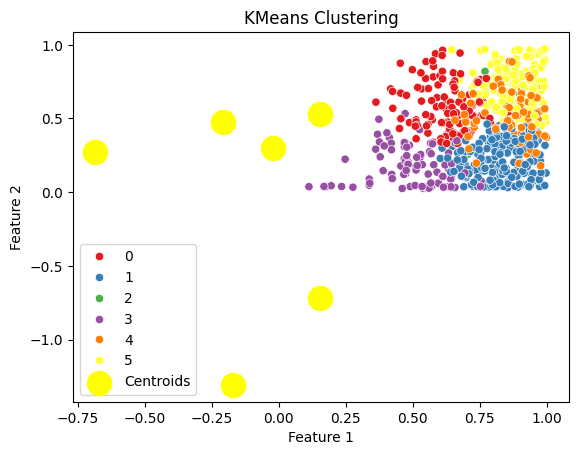

In [338]:
# Visualize the clusters
sns.scatterplot(data=main_df, x='energy', y='valence', hue='Cluster', palette='Set1')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()